In [1]:
from fastai.vision.all import*

In [2]:
path = untar_data(URLs.PASCAL_2007)

In [3]:
path

Path('C:/Users/DANIEL PC/.fastai/data/pascal_2007')

In [14]:
def f1(o): return o + "a"
def f2(o): return o + "b"
a = list(string.ascii_lowercase)
dl_a = DataLoader(a, batch_size=8, shuffle=True)
b = first(dl_a)
b

['q', 'g', 'x', 'i', 'd', 'h', 'a', 'w']

In [17]:
ds = Datasets(a, [[f1],[f2]])
ds

(#26) [('aa', 'ab'),('ba', 'bb'),('ca', 'cb'),('da', 'db'),('ea', 'eb'),('fa', 'fb'),('ga', 'gb'),('ha', 'hb'),('ia', 'ib'),('ja', 'jb')...]

In [5]:
a = list(enumerate(string.ascii_lowercase))
a[0]

(0, 'a')

In [30]:
dl = DataLoaders.from_dsets(ds, batch_size=4)
dl

first(dl.train)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [3]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [44]:
x,y = dsets.train[0]
x,y

(fname         009698.jpg
 labels      horse person
 is_valid            True
 Name: 4875, dtype: object,
 fname         009698.jpg
 labels      horse person
 is_valid            True
 Name: 4875, dtype: object)

In [35]:
db = DataBlock()

In [37]:
dsets = db.datasets(df)

In [46]:
db = DataBlock(get_x=lambda r: r['fname'], get_y=lambda r: r['labels'])
dsets = db.datasets(df)

In [48]:
dsets.train[0]

('001842.jpg', 'aeroplane')

In [4]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split()
db = DataBlock(get_x=get_x, get_y=get_y)
dsets = db.datasets(df)

In [5]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split()
db = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
               get_x=get_x, get_y=get_y)
dsets = db.datasets(df)

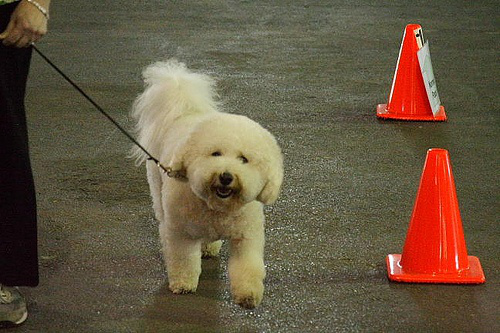

In [85]:
x

In [90]:
idx = torch.where(dsets.train[0][1] == 1.)[0]
dsets.train.vocab[idx]

(#2) ['dog','person']

In [10]:
def f1(o): return o+'a'
def f2(o): return o+'b'

In [101]:
df['is_valid'][:10]


0     True
1     True
2     True
3    False
4     True
5    False
6     True
7     True
8     True
9    False
Name: is_valid, dtype: bool

In [6]:
def splitter(df):

    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train, valid

db = DataBlock(blocks=(ImageBlock, MultiCategoryBlock), 
               splitter=splitter,
               get_x = get_x,
               get_y = get_y)

dsets = db.datasets(df)
x,y = dsets.train[0]

In [115]:
idx = torch.where(dsets.train[0][1]==1.)[0]
cl = dsets.train.vocab[idx]
cl

(#1) ['car']

In [15]:
dls = DataLoaders.from_dsets(dss, batch_size=4)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [17]:
dblock = DataBlock()
dsets = dblock.datasets(df)
len(dsets.train), len(dsets.valid)

In [24]:
dblock = DataBlock(get_x=lambda r: r['fname'], get_y=lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[0]

('005586.jpg', 'cat')

In [26]:
def get_x(r): return r['fname']
def get_y(r): return r['labels']
dblock = DataBlock(get_x=get_x, get_y=get_y)
dsets = dblock.datasets(df)
dsets.train[0]

('005210.jpg', 'tvmonitor')

In [27]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
dblock = DataBlock(get_x=get_x, get_y=get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('C:/Users/DANIEL PC/.fastai/data/pascal_2007/train/008588.jpg'),
 ['bird'])

In [13]:
model = resnet18()

In [16]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [25]:
mod = models.vgg16_bn()

In [26]:
print(mod)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256